# Week 12 – RNN Example for Sequential Data
This notebook demonstrates how to build and train a Recurrent Neural Network, specifically an LSTM model, using Keras. I have applied this model on a simple sequence prediction task to illustrate the core idea behind using memory-based networks to capture time-dependent patterns.

This serves as a companion to the summary on RNNs.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split

### Generate Synthetic Sequence Data

In [16]:
# Generate a simple sine wave dataset for sequence prediction
def generate_sequence_data(n_samples=1000, seq_length=10):
    X = []
    y = []
    for i in range(n_samples):
        start = np.random.rand() * 2 * np.pi
        seq = np.sin(np.linspace(start, start + seq_length * 0.1, seq_length + 1))
        X.append(seq[:-1])
        y.append(seq[-1])
    X = np.array(X).reshape((n_samples, seq_length, 1))
    y = np.array(y)
    return X, y

X, y = generate_sequence_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (800, 10, 1)
Shape of y_train: (800,)


### Build and Train the RNN Model

In [17]:
model = Sequential()
model.add(SimpleRNN(units=20, activation='tanh', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 20)             │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461 (1.80 KB)

 Trainable params: 461 (1.80 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.3376 - mae: 0.5326 - val_loss: 0.0809 - val_mae: 0.2640
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0501 - mae: 0.2001 - val_loss: 0.0115 - val_mae: 0.0949
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0104 - mae: 0.0878 - val_loss: 0.0083 - val_mae: 0.0822
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0071 - mae: 0.0745 - val_loss: 0.0058 - val_mae: 0.0658
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0053 - mae: 0.0629 - val_loss: 0.0039 - val_mae: 0.0557
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0032 - mae: 0.0492 - val_loss: 0.0028 - val_mae: 0.0447
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0023 - mae: 0.0411 - val_loss: 0.0018 - val_mae: 0.0368
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0016 - mae: 0.0336 - val_loss: 0.0013 - val_mae: 0.0296
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0010

### Evaluate the Model

In [18]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5206e-04 - mae: 0.0141  
Test Loss: 0.0002, Test MAE: 0.0139


### Visualize Predictions

1/7 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


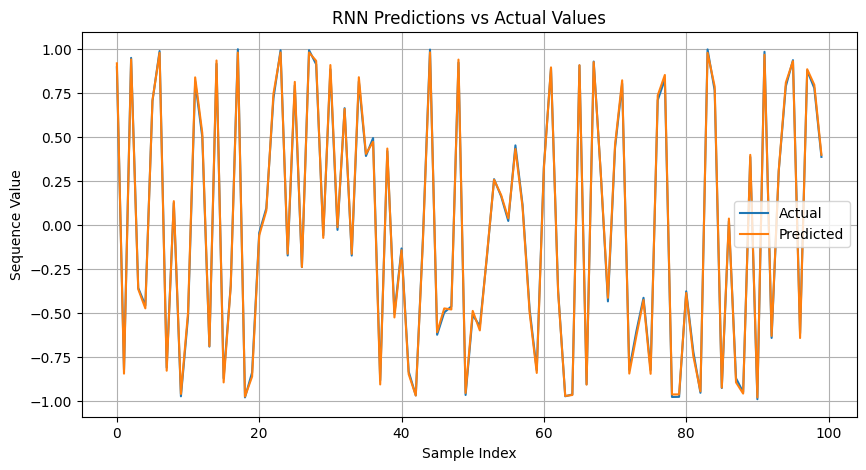

In [19]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.legend()
plt.title("RNN Predictions vs Actual Values")
plt.xlabel("Sample Index")
plt.ylabel("Sequence Value")
plt.grid(True)
plt.show()

## Summary of the Task
I have:
- Generated a sequence dataset (e.g., predicting the next number)
- Using a LSTM layer to train a sequence model
- Evaluating and visualizing the predictions

This mimics real-world tasks like patient monitoring or medical event forecasting.

In [20]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

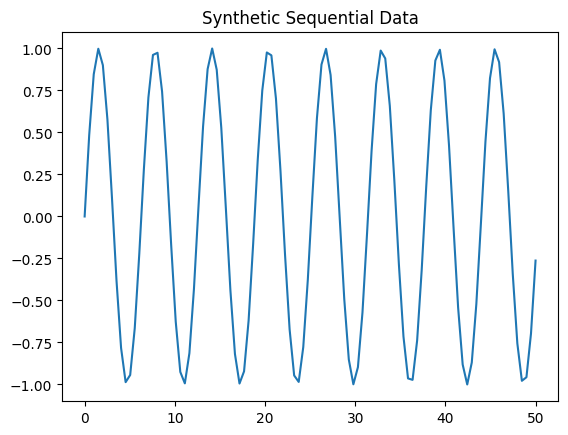

In [21]:
# Create a toy sequence prediction problem
def generate_data(seq_length=50):
    x = np.linspace(0, 50, seq_length)
    y = np.sin(x)
    return x, y

x_raw, y_raw = generate_data(100)
plt.plot(x_raw, y_raw)
plt.title('Synthetic Sequential Data')
plt.show()

In [22]:
# Prepare data for LSTM input format
window = 10
X, y = [], []
for i in range(len(y_raw) - window):
    X.append(y_raw[i:i + window])
    y.append(y_raw[i + window])

X = np.array(X)
y = np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))  # LSTM expects 3D input

In [23]:
# Build and train an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=100, verbose=0)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


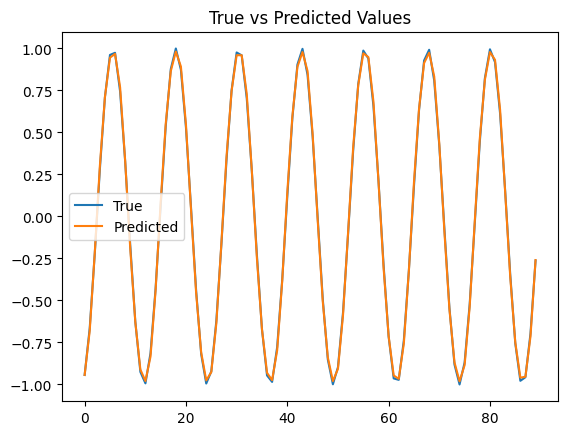

In [24]:
# Make predictions and visualize results
y_pred = model.predict(X)
plt.plot(y, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('True vs Predicted Values')
plt.show()

## Conclusion
This example demonstrates how an LSTM can learn sequential dependencies, making it valuable for time-series problems. Such networks can be applied to real-world medical data like patient vitals or event forecasting in ICUs.

By remembering previous inputs and adjusting its memory with gates, the LSTM captures patterns over time better than traditional networks.